#SPEED DATING
*   What are the important criteria of opposite sex before dating ? 
*   Does people change these criteria when they meet their match in 4 minutes ? 
*   Which principal factors to decide to say "Yes" ?

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import cycle, islice

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
path = 'https://raw.githubusercontent.com/JedhaBootcamp/FULL_STACK_12_WEEK_PROGRAM/master/S0.2%20--%20Data%20Visualisation%20%26%20Collaboration/Projet%20--%20SPEED%20DATING/Speed%20Dating%20Data.csv?token=AN4HTBQ2EIUYK4EBZJIECY266DDAU'
df = pd.read_csv(path, encoding="ISO-8859-1", engine='python')

In [30]:
df.shape

(8378, 195)

In [3]:
df.describe(include='all')

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,...,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8283.000000,8315,8296.000000,4914,3133,3583,8315.000000,...,4377.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259,NaN,241,68,115,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Business,NaN,UC Berkeley,"1,400.00","26,908.00",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521,NaN,107,403,241,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,8.963595,283.863767,0.164717,0.196010,0.395799,26.364999,2.756653,22.495347,17.396867,20.270759,17.459714,10.685375,11.845930,0.419551,6.190411,7.175256,7.369301,6.400599,6.778409,5.474870,6.134498,5.208251,1.960215,26.358928,NaN,7.662488,NaN,NaN,NaN,2.757186,...,7.332191,0.780825,0.981631,0.376950,1.230615,0.934132,24.384524,16.588583,19.411346,16.233415,10.898075,12.699142,31.330357,15.654266,16.679563,16.418155,7.823909,12.207837,25.610341,10.751267,11.524839,14.276783,9.207503,11.253802,24.970936,10.923285,11.952687,14.959108,9.526191,11.966270,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,5.491068,158.584899,0.370947,0.303539,0.489051,3.563648,1.230689,12.569802,7.044003,6.782895,6.085526,6.126544,6.362746,0.493515,1.950305,1.740575,1.550501,1.954078,1.794080,2.156163,1.841258,2.129354,0.245925,3.566763,NaN,3.758935,NaN,NaN,NaN,1.230905,...,1.521854,1.611694,1.382139,0.484683,1.294557,0.753902,13.712120,7.471537,6.124502,5.163777,5.900697,6.557041,17.551540,9.336288,7.880088,7.231325,6.100502,8.615985,17.477134,5.740351,6.004222,6.927869,6.385852,6.516178,17.007669,6.226283,7.010650,7.935509,6.403117,7.012067,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,

In [31]:
null_features = df.columns[df.isnull().sum()/df.shape[0] >= 0.5]
print('Features with empty values >=50% : {}'.format(len(null_features)))
print()
print(null_features)

Features with empty values >=50% : 59

Index(['mn_sat', 'tuition', 'expnum', 'attr1_s', 'sinc1_s', 'intel1_s',
       'fun1_s', 'amb1_s', 'shar1_s', 'attr3_s', 'sinc3_s', 'intel3_s',
       'fun3_s', 'amb3_s', 'attr7_2', 'sinc7_2', 'intel7_2', 'fun7_2',
       'amb7_2', 'shar7_2', 'you_call', 'them_cal', 'date_3', 'numdat_3',
       'num_in_3', 'attr1_3', 'sinc1_3', 'intel1_3', 'fun1_3', 'amb1_3',
       'shar1_3', 'attr7_3', 'sinc7_3', 'intel7_3', 'fun7_3', 'amb7_3',
       'shar7_3', 'attr4_3', 'sinc4_3', 'intel4_3', 'fun4_3', 'amb4_3',
       'shar4_3', 'attr2_3', 'sinc2_3', 'intel2_3', 'fun2_3', 'amb2_3',
       'shar2_3', 'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3',
       'attr5_3', 'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3'],
      dtype='object')


Define sum functions
*   Police of figure
*   Get annotation



In [67]:
#def get_figure(rows=1, cols=1, width=6, height=6):
#    plt.subplots(rows,cols, figsize=(width, width))
#    plt.rcParams.update({'font.size': 20})


In [4]:
def get_annot(ax, distance_to_bar = 0.5, decimal=1):
#to get annotation on barplot
#ax : axis to apply 
#distance_to_bar : distance of annot. position to bar
# decimal : number of decimal 
    for p in ax.patches:
        height = round((p.get_height()),decimal) + distance_to_bar
        ax.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center", fontsize=15)

Text(0.5, 1.0, 'Decision')

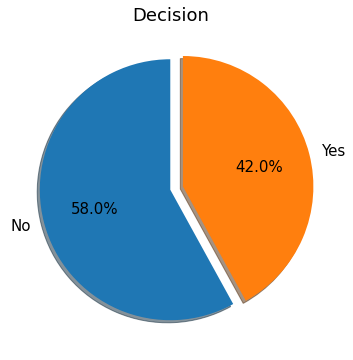

In [174]:
decision = ['dec']
dec = ['No', 'Yes']

plt.figure(figsize=(6,6))
plt.rcParams.update({'font.size': 15})
plt.pie(df['dec'].value_counts(), autopct='%1.1f%%',shadow=True, startangle=90, explode = (0, 0.1), labels=dec)
plt.title('Decision')


Text(0.5, 1.0, 'Decision')

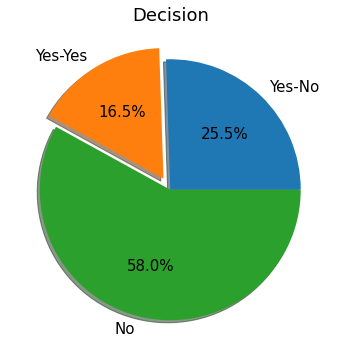

In [53]:
yes_yes = df[(df['dec']==1)&(df['dec_o']==1)]['dec'].sum()/df.shape[0] #Me : Yes, Partner : Yes
yes_no  = df[(df['dec']==1)&(df['dec_o']==0)]['dec'].sum()/df.shape[0] #Me : Yes, Partner : No
no      =  1 - yes_no - yes_yes                                        #Me : No

dec_labels = ['yes_no','yes_yes', 'no']
df_dec = [yes_no,yes_yes, no]

plt.figure(figsize=(6,6))
plt.rcParams.update({'font.size': 15})
plt.pie(df_dec, autopct='%1.1f%%',shadow=True, startangle=0, explode = (0, 0.1, 0), labels= ['Yes-No', 'Yes-Yes', 'No'])
plt.title('Decision')

#Who are participants ?

*   Age
*   Race
*   From ? 
*   Field of study
*   Income





In [5]:
race = ['Africain', 'European', 'Latino',  'Asian', 'Other']
gender = ['Female', 'Male']
field_cd = ['Law', 'Math', 'Soc. Scien.', 'Med. Scien.', 'Eng.', 'Jour.', 'Hist.', 'Econ', 'Aca.', 'Nat. Scien.', 'Soc. Work', 'Undergrad', 'Pol. Scien.', 'Film', 'Art', 'Lang.', 'Arch.', 'Other']

Text(0.5, 1.0, 'Gender')

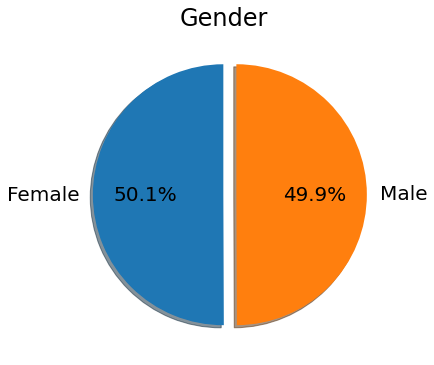

In [40]:
plt.figure(figsize=(6,6))
plt.pie(df['gender'].value_counts(), autopct='%1.1f%%',shadow=True, startangle=90, explode = (0, 0.1), labels=gender)
plt.title('Gender')

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


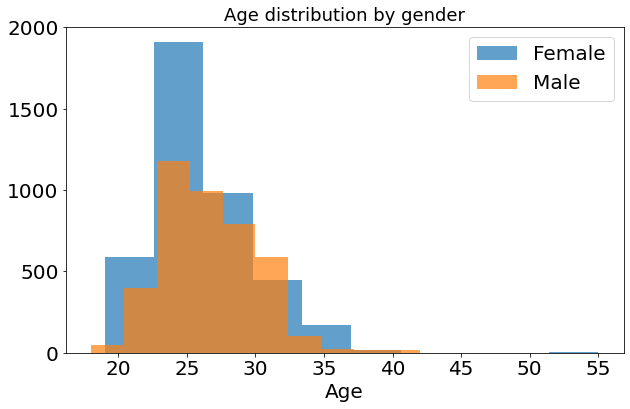

In [80]:
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(df[df['gender']==0]['age'], alpha= 0.7, label='Female')
ax.hist(df[df['gender']==1]['age'], alpha= 0.7, label='Male')
plt.legend()
plt.xlabel('Age')
plt.title('Age distribution by gender', fontsize=18)
plt.show()

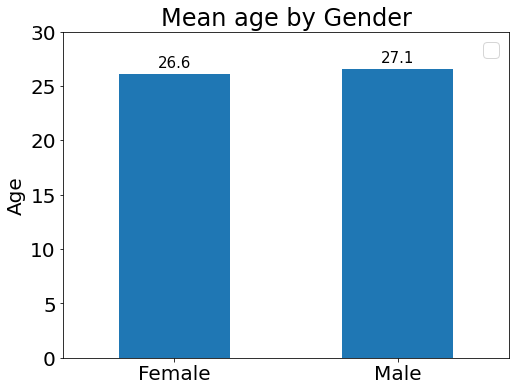

In [71]:
ax = df[['gender', 'age']].groupby(['gender']).mean().plot(kind='bar', figsize=(8,6))
ax.set_xticklabels(gender, rotation='horizontal')
ax.set_title('Mean age by Gender')
ax.set_ylim([0, 30])
plt.xlabel('')
plt.ylabel('Age')
plt.legend('')
get_annot(ax=ax)
plt.rcParams.update({'font.size': 20})


In [72]:
df[['race', 'gender']].groupby('race').count()

,gender
race,
1.0,420
2.0,4727
3.0,664
4.0,1982
6.0,522


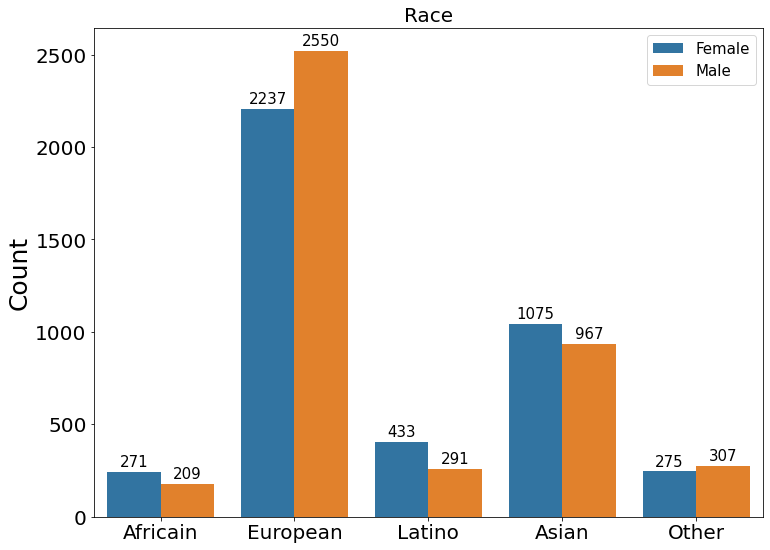

In [75]:
fig, ax = plt.subplots(figsize=(12,9))
ax = sns.countplot(data=df, x='race', hue='gender')

ax.legend(gender, fontsize=15)
ax.set_xticklabels(race)
plt.xlabel('')
plt.ylabel('Count', fontsize=25)
plt.title('Race', fontsize=20)

get_annot(ax, distance_to_bar=30, decimal=0)
plt.rcParams.update({'font.size': 20})
plt.show()

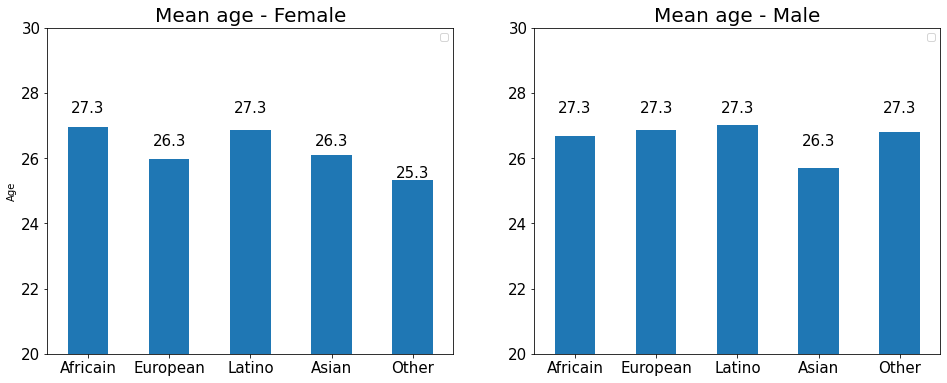

In [11]:
fig, ax= plt.subplots(1,2, figsize=(16, 6))

df[df['gender']==0][['race', 'age']].groupby(['race']).mean().plot(kind='bar', ax=ax[0], ylim=(20,30))
df[df['gender']==1][['race', 'age']].groupby(['race']).mean().plot(kind='bar', ax=ax[1], ylim=(20,30))

ax[0].set_xticklabels(race, fontsize=15, rotation='horizontal')
ax[0].set_title('Mean age - Female', fontsize=20)
ax[0].tick_params(labelsize=15)
ax[0].set_xlabel('')
ax[0].set_ylabel('Age')
ax[0].legend('')
get_annot(ax=ax[0], decimal=0, distance_to_bar=0.3)

ax[1].set_xlabel('',fontsize=1)
ax[1].set_xticklabels(race, fontsize=15, rotation='horizontal')
ax[1].set_title('Mean age - Male', fontsize=20)
ax[1].legend('')
ax[1].tick_params(labelsize=15)
get_annot(ax=ax[1], decimal=0, distance_to_bar=0.3)

Decision vs. Age, Race

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


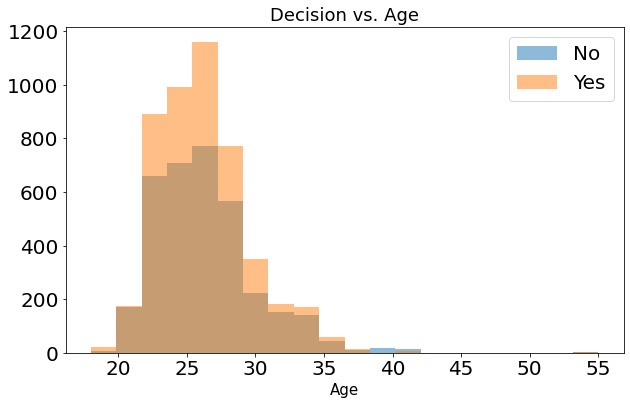

In [57]:
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(df[df['dec']==1]['age'], alpha= 0.5, label='No', bins=20)
ax.hist(df[df['dec']==0]['age'], alpha= 0.5, label='Yes', bins=20)

plt.legend()
plt.xlabel('Age', fontsize=15)
plt.title('Decision vs. Age', fontsize=18)
plt.rcParams.update({'font.size': 20})
plt.show()

It's seem to be that people between 22-30 years old will decide to say "Yes" more frequently

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


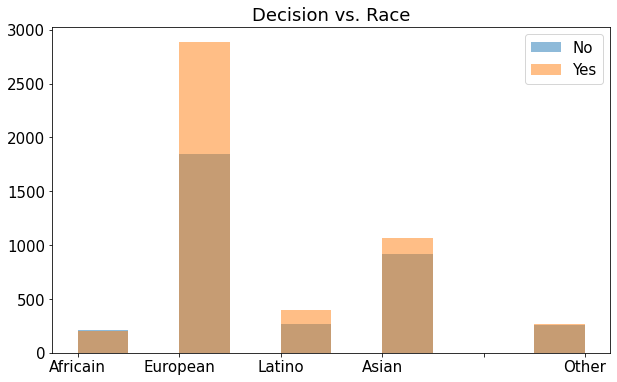

In [54]:
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(df[df['dec']==1]['race'], alpha= 0.5, label='No')
ax.hist(df[df['dec']==0]['race'], alpha= 0.5, label='Yes')

plt.legend()
plt.xlabel('', fontsize=15)
ax.set_xticklabels(['', 'Africain', 'European', 'Latino',  'Asian','' ,'Other'],rotation=0, fontsize=15)
plt.title('Decision vs. Race', fontsize=18)
plt.rcParams.update({'font.size': 20})
plt.show()

*   European race have much "Yes" decision than "No"
*   Latino & Asian race : more "Yes" than "No"
*   For Africain & Other : chance of "Yes" and "No" are equilibrium



Field of study

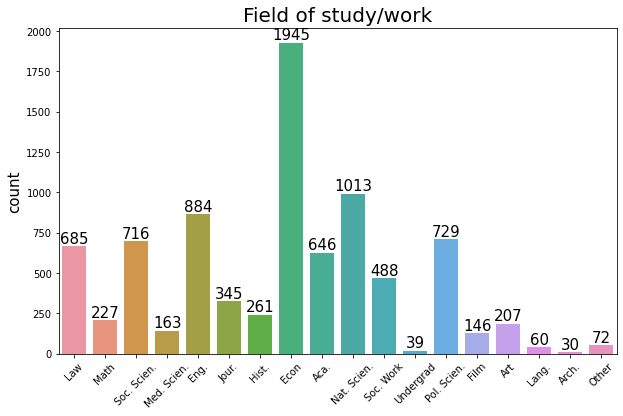

In [65]:
plt.figure(figsize=(10,6))
ax = sns.countplot(df['field_cd'])

ax.set_title('Field of study/work', fontsize=20)
ax.set_xlabel('')
ax.set_xticklabels(field_cd,rotation=45)
ax.tick_params(labelsize=10)
ax.set_ylabel('count', fontsize=15)

get_annot(ax, distance_to_bar=20, decimal=0)
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


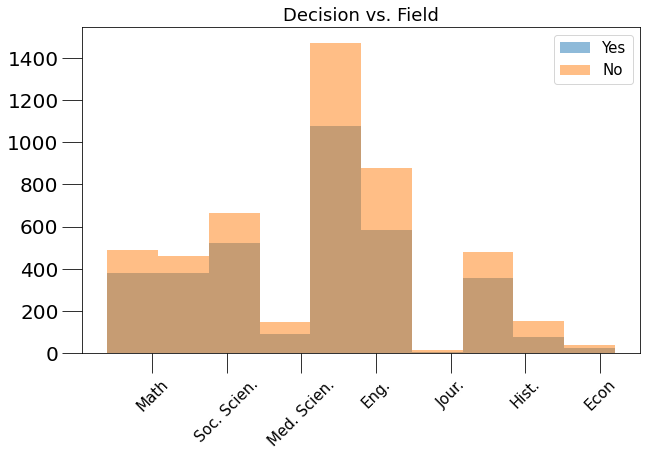

In [68]:
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(df[df['dec']==1]['field_cd'], alpha= 0.5, label='Yes')
ax.hist(df[df['dec']==0]['field_cd'], alpha= 0.5, label='No')

plt.legend()
plt.xlabel('', fontsize=15)
ax.set_xticklabels(field_cd,rotation=45, fontsize=15)
plt.title('Decision vs. Field', fontsize=18)
plt.legend(prop={'size': 15})
plt.tick_params(size=20)
plt.show()

In [70]:
dec_yes_field = (df[['dec', 'field_cd']].groupby(['field_cd']).sum()/df[['dec', 'field_cd']].groupby(['field_cd']).count())
dec_yes_field

,dec
field_cd,
1.0,0.463158
2.0,0.352657
3.0,0.448276
4.0,0.468531
5.0,0.472222
6.0,0.350769
7.0,0.385892
8.0,0.412468
9.0,0.453674


We see that the 'Yes' rate varies for different field, but this variation isn't explicit. We will see more in the correlation map.



From where ?

In [60]:
regions = df['from'].value_counts()
print('People from {} regions'.format(len(regions)))
print(regions)

People from 269 regions
New York          522
New Jersey        365
California        301
China             139
Italy             132
                 ... 
Pougkeepsie NY      5
Europe              5
sofia, bg           5
china               5
Greenwich, CT       5
Name: from, Length: 269, dtype: int64


It's difficult to say if a regions have more "Yes" than "No" when we have a lot of places.

In [73]:
print('Participant income : empty values is {:2.2%}'.format(df['income'].isnull().sum()/df.shape[0]))


Participant income : empty values is 48.93%


As the income subject is quite sensible to ask when we see each other in only 4 minutes, and income change a lot in function of experience years, fields and companies, I think that the decision in Speed Dating does not depend much on the income. 

#Importance of Race, Importance of Regiligion 
Does people care about that ?

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


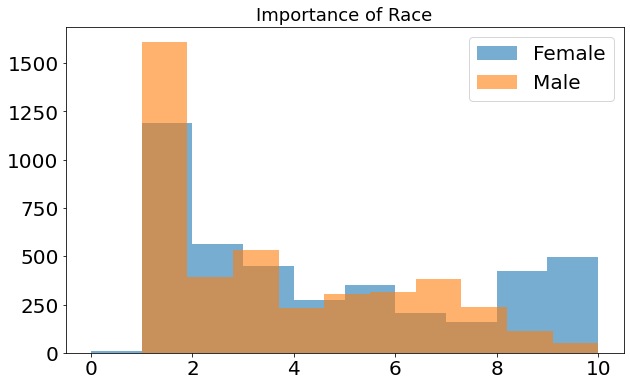

In [74]:
plt.figure(figsize=(10,6))
plt.hist(df[df['gender']==0]['imprace'], alpha= 0.6, label='Female')
plt.hist(df[df['gender']==1]['imprace'], alpha= 0.6, label='Male')
plt.legend()
plt.title('Importance of Race', fontsize=18)

plt.show()

In [80]:
print('Female considers Importance of Race is more than 7 :')
print('{:2.2%}'.format(df[(df['gender']==0) & (df['imprace']>7)]['imprace'].count()/df.shape[0]))

Female considers Importance of Race is more than 7 :
10.99%


Male seem to be do not care much on the race, while 11% of female rate this critera is important.

dec          0     1
samerace            
0         2983  2079
1         1877  1439


[Text(0, 0, 'Diff. Race'), Text(0, 0, 'Same Race')]

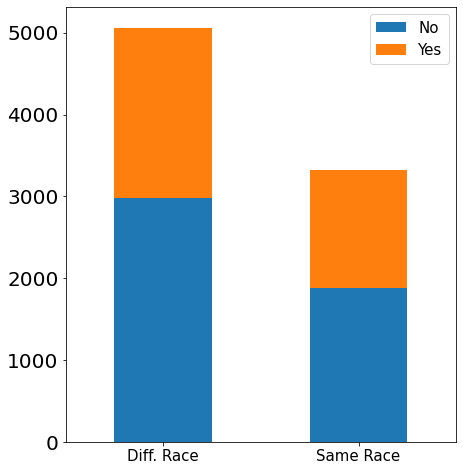

In [88]:
df_imprace = df.groupby(['samerace', 'dec']).size().reset_index().pivot(columns='dec', index='samerace', values=0)
print(df_imprace)
ax = df_imprace.plot(kind='bar', stacked=True, figsize=(7,8))
plt.legend(['No', 'Yes'],fontsize=15)
plt.xlabel('')
plt.rcParams.update({'font.size': 20})
ax.set_xticklabels(['Diff. Race', 'Same Race'], fontsize=15, rotation=0)

In [89]:
print('Decision vs.Samerace')
df_race_imprace = df[['dec','samerace', 'race']].groupby(['race','samerace']).mean()*100
df_race_imprace

Decision vs.Samerace


dec
race samerace           
1.0  0         49.502488
     1         77.777778
2.0  0         33.549675
     1         42.988253
3.0  0         39.869281
     1         48.076923
4.0  0         46.870839
     1         43.750000
6.0  0         50.000000
     1         45.238095

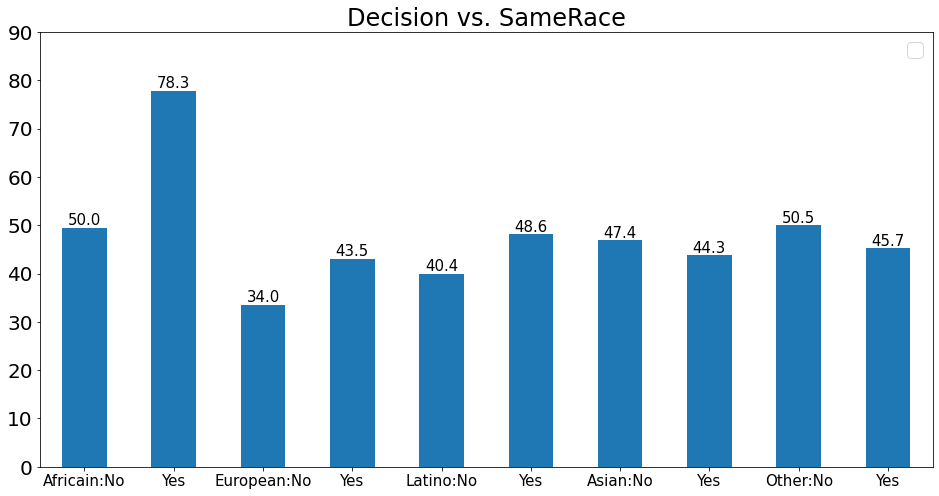

In [91]:
ax = df_race_imprace.plot(kind='bar',stacked=True, figsize=(16,8))
plt.legend('')
plt.ylim([0,90])
plt.xlabel('')
plt.rcParams.update({'font.size': 20})
ax.set_xticklabels(['Africain:No','Yes', 'European:No','Yes', 'Latino:No','Yes',  'Asian:No','Yes', 'Other:No','Yes'], fontsize=15, rotation=0)
plt.title('Decision vs. SameRace')
get_annot(ax=ax, decimal=1)
plt.show()

We don't see an explicit dependance of Samerace on Decision (previous figure). However, this is importance for Africain to say Yes or No. 

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


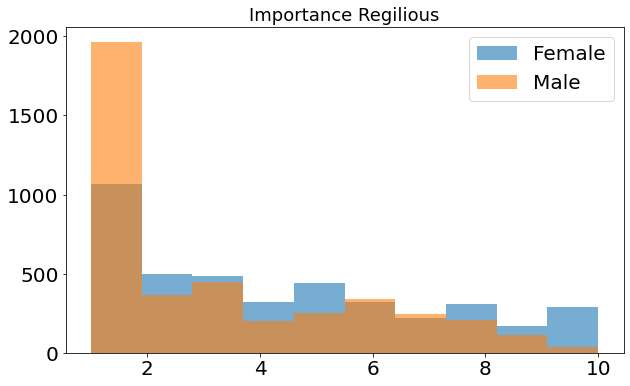

In [93]:
plt.figure(figsize=(10,6))
plt.hist(df[df['gender']==0]['imprelig'], alpha= 0.6, label='Female')
plt.hist(df[df['gender']==1]['imprelig'], alpha= 0.6, label='Male')
plt.legend()
plt.title('Importance Regilious', fontsize=18)

plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


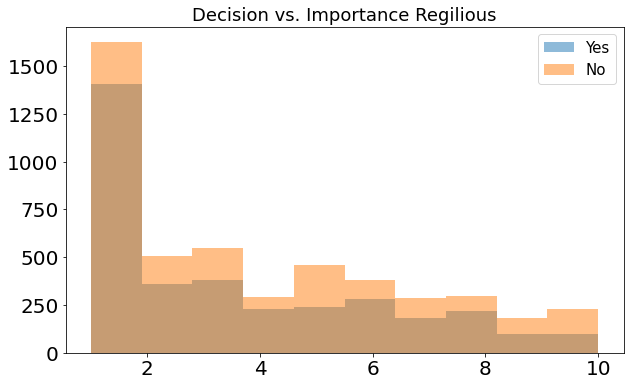

In [96]:
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(df[df['dec']==1]['imprelig'], alpha= 0.5, label='Yes')
ax.hist(df[df['dec']==0]['imprelig'], alpha= 0.5, label='No')

plt.legend()
plt.xlabel('', fontsize=15)
plt.title('Decision vs. Importance Regilious', fontsize=18)
plt.legend(prop={'size': 15})
plt.show()

In these 2 graphs, the decision does not explicitly depend on the rate of importance regilious.

#Before Dating

*   Goal, Expectation of Happy, Exp. of Date, exp. of match : goal, exphappy,expnum, match_es
*   Attributes of partner : attr1_1 (Attractive), sinc1_1 (Sincere), intel1_1 (Intelligent), fun1_1(Fun), amb1_1 (Ambitious), shar1_1 (Has shared interests/hobbies)



Expectation

In [97]:
goal = ['','fun', 'meet pp.', 'a date', 'ser. relat.', 'did it', 'other']
df['goal'].value_counts()

1.0    3426
2.0    3012
3.0     631
5.0     510
6.0     419
4.0     301
Name: goal, dtype: int64

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


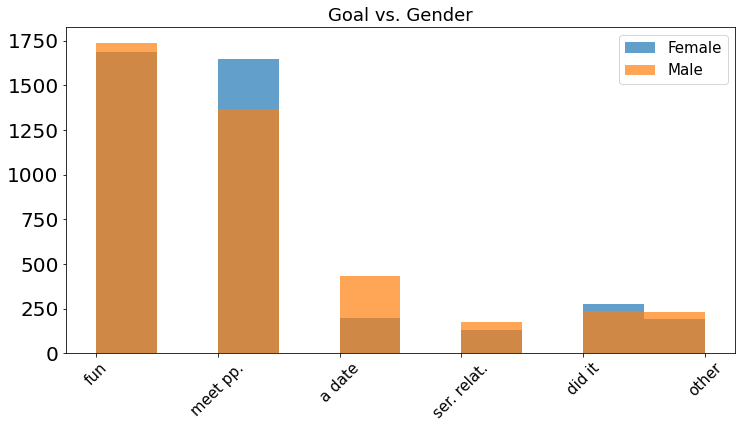

In [98]:
fig, ax = plt.subplots(figsize=(12,6))
ax.hist(df[df['gender']==0]['goal'], alpha= 0.7, label='Female')
ax.hist(df[df['gender']==1]['goal'], alpha= 0.7, label='Male')
plt.legend(fontsize=15)
ax.set_xticklabels(goal,rotation=45, fontsize=15)
plt.xlabel('')
plt.title('Goal vs. Gender', fontsize=18)
plt.rcParams.update({'font.size': 20})
plt.show()

More of man looks for a date and serious relationship in Speed Dating than woman

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


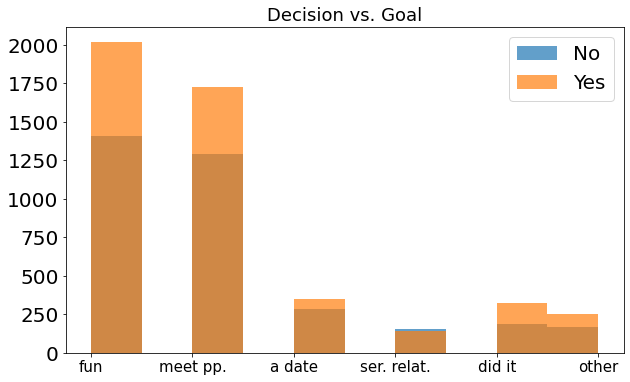

In [99]:
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(df[df['dec']==1]['goal'], alpha= 0.7, label='No')
ax.hist(df[df['dec']==0]['goal'], alpha= 0.7, label='Yes')

plt.legend()
plt.xlabel('', fontsize=15)
ax.set_xticklabels(['','fun', 'meet pp.', 'a date', 'ser. relat.', 'did it', 'other'],rotation=0, fontsize=15)
plt.title('Decision vs. Goal', fontsize=18)
plt.rcParams.update({'font.size': 15})
plt.show()

People can say "yes" easier if they come to Speed Dating with fun, meet pp. goal; while they are more selective when finding a serious relationship.

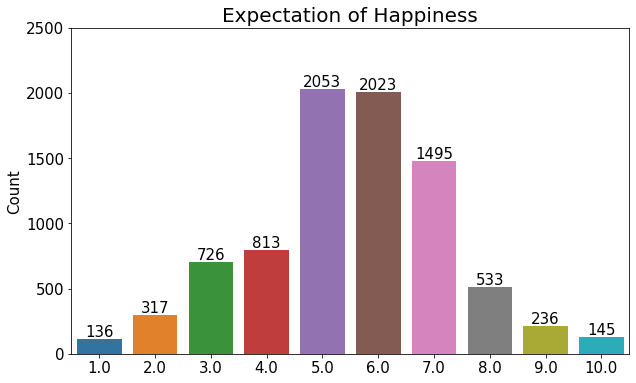

In [100]:
fig, ax = plt.subplots(figsize=(10,6))

sns.countplot(data=df, x='exphappy')
plt.title('Expectation of Happiness', fontsize=20)
plt.xlabel('')
plt.ylabel('Count', fontsize=15)
plt.ylim([0,2500])
plt.tick_params(labelsize=15)

get_annot(ax=ax, distance_to_bar=20)

Almost people expect between 5-7 points of happiness - middle of range.

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


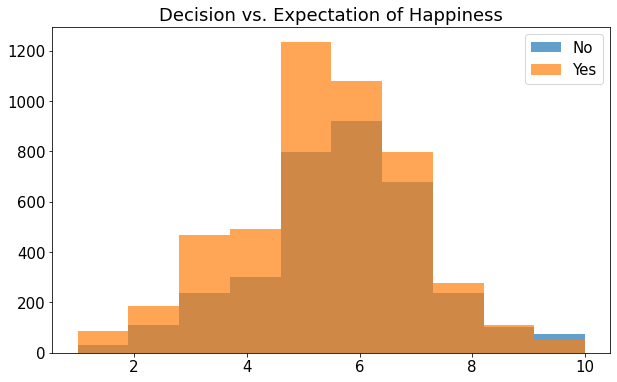

In [101]:
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(df[df['dec']==1]['exphappy'], alpha= 0.7, label='No')
ax.hist(df[df['dec']==0]['exphappy'], alpha= 0.7, label='Yes')

plt.legend()
plt.xlabel('', fontsize=15)
plt.title('Decision vs. Expectation of Happiness', fontsize=18)
plt.rcParams.update({'font.size': 15})
plt.show()

Less expectation of happiness, more easier to say Yes

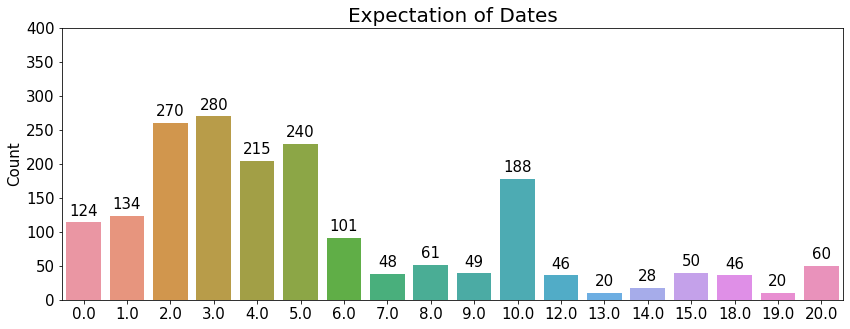

In [105]:
fig, ax = plt.subplots(figsize=(14,5))

sns.countplot(data=df, x='expnum')
plt.title('Expectation of Dates', fontsize=20)
plt.xlabel('')
plt.ylabel('Count', fontsize=15)
plt.ylim([0,400])
plt.rcParams.update({'font.size': 15})
get_annot(ax, distance_to_bar=10, decimal=0)

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


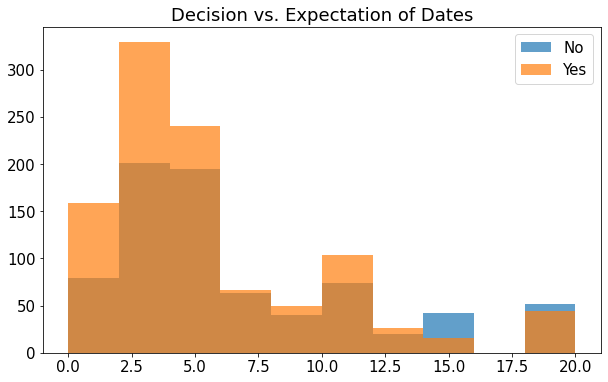

In [106]:
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(df[df['dec']==1]['expnum'], alpha= 0.7, label='No')
ax.hist(df[df['dec']==0]['expnum'], alpha= 0.7, label='Yes')

plt.legend()
#ax.set_xticklabels(['','several/w', '2/w', '1/w', '2/m.', '1/m', 'several/y', 'alm. never'],rotation=0, fontsize=12)
plt.xlabel('', fontsize=15)
plt.title('Decision vs. Expectation of Dates', fontsize=18)
plt.rcParams.update({'font.size': 15})
plt.show()

Less expectation of number of Date, more easier to say Yes

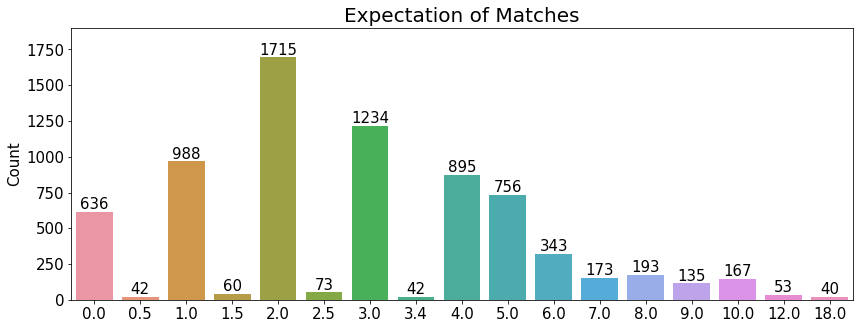

In [138]:
fig, ax = plt.subplots(figsize=(14,5))

sns.countplot(data=df, x='match_es')
plt.title('Expectation of Matches', fontsize=20)
plt.xlabel('')
plt.ylabel('Count', fontsize=15)
plt.ylim([0,1900])
plt.rcParams.update({'font.size': 15})
get_annot(ax, distance_to_bar=20, decimal=0)

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


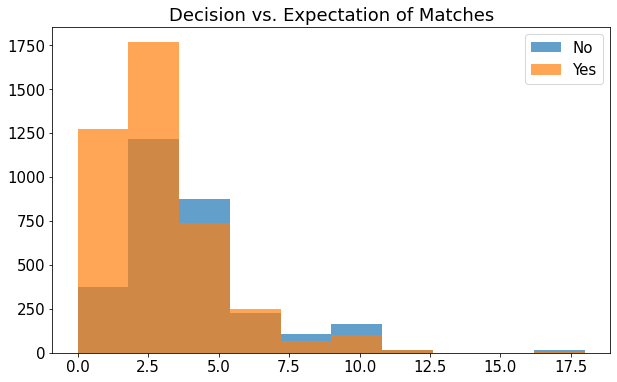

In [139]:
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(df[df['dec']==1]['match_es'], alpha= 0.7, label='No')
ax.hist(df[df['dec']==0]['match_es'], alpha= 0.7, label='Yes')

plt.legend()
#ax.set_xticklabels(['','several/w', '2/w', '1/w', '2/m.', '1/m', 'several/y', 'alm. never'],rotation=0, fontsize=12)
plt.xlabel('', fontsize=15)
plt.title('Decision vs. Expectation of Matches', fontsize=18)
plt.rcParams.update({'font.size': 15})
plt.show()

Less expectation of number of Matches, more easier to say Yes

#Before Dating
*   What are you looking for ?
*   Attributes of partner : attr1_1 (Attractive), sinc1_1 (Sincere), intel1_1 (Intelligent), fun1_1(Fun), amb1_1 (Ambitious), shar1_1 (Has shared interests/hobbies)




Text(0.5, 0.98, 'What are you looking for in the opposite sex ?')

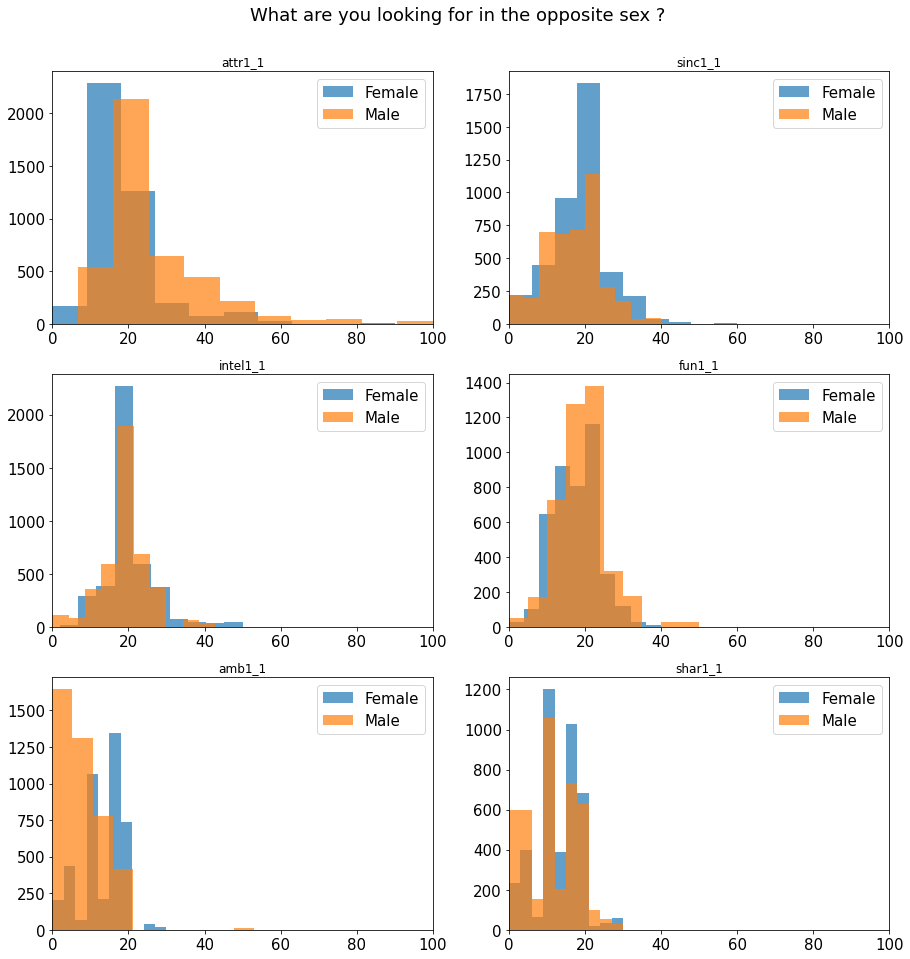

In [118]:
features_attribute_before = ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']

num = len(feats_attribute_before)
rows = int(num/2) + (num % 2 > 0)
fig, ax = plt.subplots(rows, 2, figsize=(15, 5 * (rows)))
i = 0
j = 0
for feat in feats_attribute_before:
    df[df.gender==0][feat].hist(label='Female', ax=ax[i][j], bins=10, alpha=0.7)
    df[df.gender==1][feat].hist(label='Male', ax=ax[i][j], bins=10, alpha=0.7)
    ax[i][j].set_title(feat, fontsize=12)
    ax[i][j].grid(False)
    ax[i][j].legend()
    ax[i][j].set_xlim(xmin=0.0, xmax=100)
    j = (j+1)%2
    i = i + 1 - j
    
plt.subplots_adjust(top=0.92)
fig.suptitle('What are you looking for in the opposite sex ?')

Man looks for Attractiveness, while woman looks for Ambition (as we think usally) :-)

#Decision vs. Habit
*   Frequence of Go-out, Date
*   Interests : sports,	tvsports,	exercise,	dining,	museums,	art	hiking,	gaming,	clubbing,	reading,	tv,	theater,	movies,	concerts,	music,	shopping,	yoga



In [119]:
frequence = ['several/w', '2/w', '1/w', '2/m.', '1/m', 'several/y', 'alm. never']

Text(0.5, 1.0, 'Frequence of Go-out')

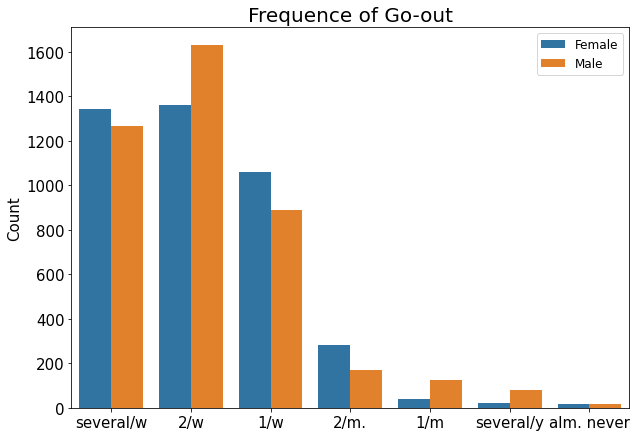

In [129]:
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(df['go_out'], hue=df['gender'])
ax.set_xticklabels(frequence, fontsize=15)
plt.legend(gender, fontsize=12)
plt.xlabel('')
plt.ylabel('Count', fontsize=15)
plt.title('Frequence of Go-out', fontsize=20)

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


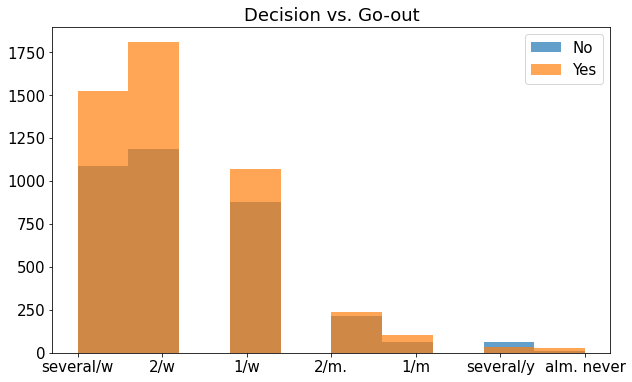

In [130]:
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(df[df['dec']==1]['go_out'], alpha= 0.7, label='No')
ax.hist(df[df['dec']==0]['go_out'], alpha= 0.7, label='Yes')

plt.legend()
plt.xlabel('', fontsize=15)
ax.set_xticklabels(['','several/w', '2/w', '1/w', '2/m.', '1/m', 'several/y', 'alm. never'],rotation=0, fontsize=15)
plt.title('Decision vs. Go-out', fontsize=18)
plt.rcParams.update({'font.size': 15})
plt.show()

People who comes out lots (several-2 times per week), say Yes easier than others

Text(0.5, 1.0, 'Frequence of Date')

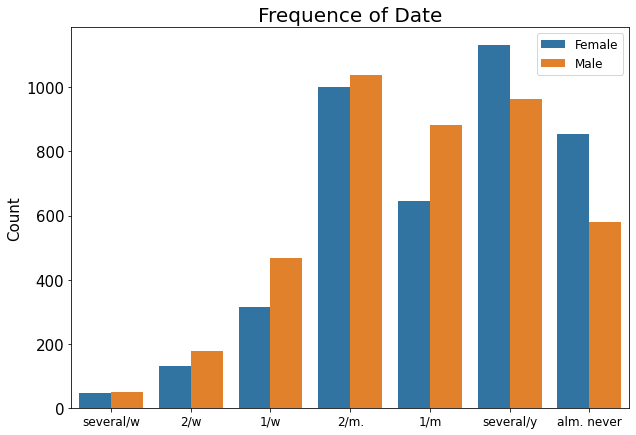

In [121]:
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(df['date'], hue=df['gender'])
ax.set_xticklabels(frequence, fontsize=15)
plt.legend(gender, fontsize=12)
plt.xlabel('')
ax.set_xticklabels(['several/w', '2/w', '1/w', '2/m.', '1/m', 'several/y', 'alm. never'],rotation=0, fontsize=12)
plt.ylabel('Count', fontsize=15)
plt.title('Frequence of Date', fontsize=20)

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


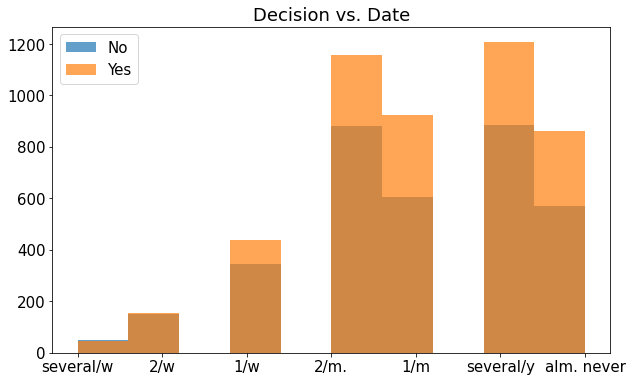

In [127]:
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(df[df['dec']==1]['date'], alpha= 0.7, label='No')
ax.hist(df[df['dec']==0]['date'], alpha= 0.7, label='Yes')

plt.legend()
ax.set_xticklabels(['','several/w', '2/w', '1/w', '2/m.', '1/m', 'several/y', 'alm. never'],rotation=0, fontsize=15)
plt.xlabel('', fontsize=15)
plt.title('Decision vs. Date', fontsize=18)
plt.rcParams.update({'font.size': 15})
plt.show()

It's is interesting that less date people has, more chance to say Yes

In [140]:
feats_interest = ['sports',	'tvsports',	'exercise',	'dining',	'museums',	'art', 'hiking',	'gaming',	
                  'clubbing',	'reading',	'tv',	'theater',	'movies',	'concerts',	'music',	'shopping',	'yoga']

Text(0.5, 0.98, 'Decision vs. Interest')

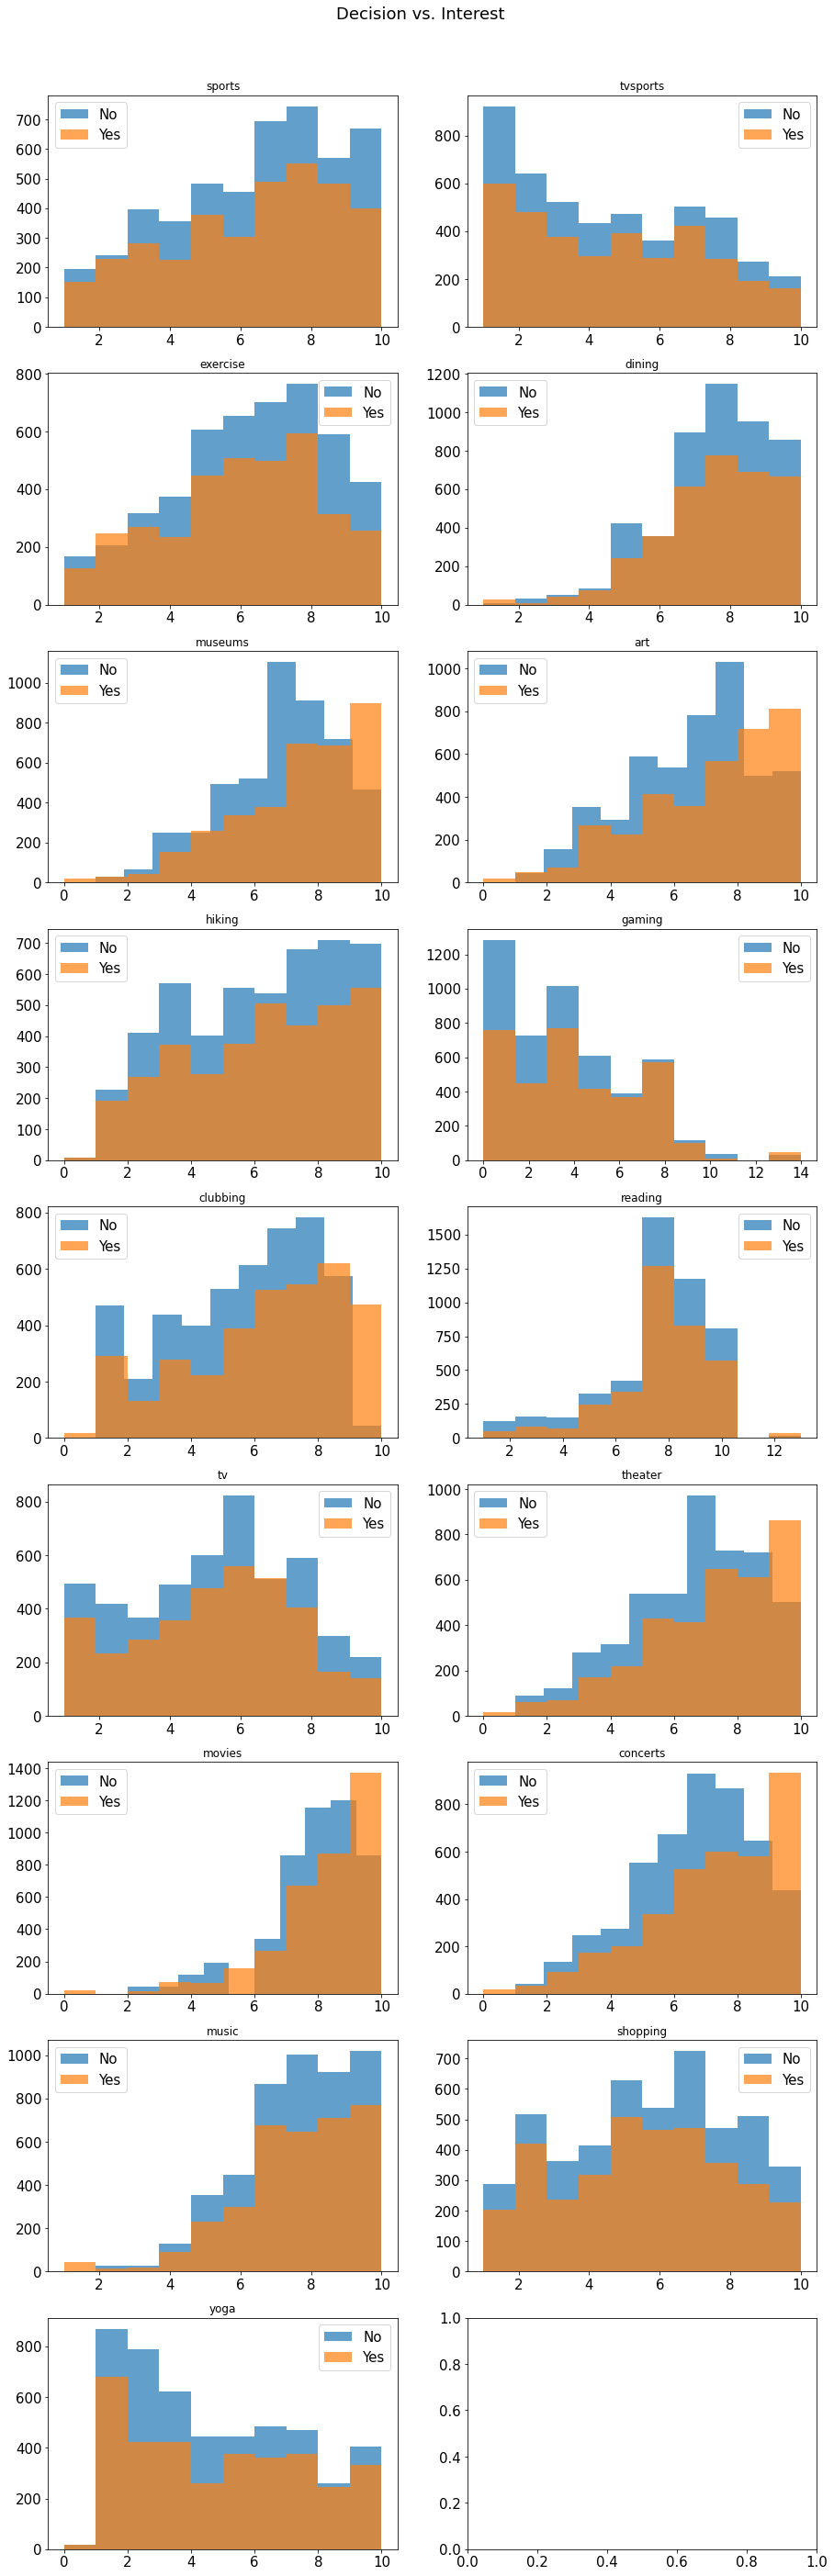

In [154]:
num = len(feats_interest)
rows = int(num/2) + (num % 2 > 0)
fig, ax = plt.subplots(rows, 2, figsize=(15, 5 * (rows)))
i = 0
j = 0
for feat in feats_interest:
    df[df.dec==0][feat].hist(label='No', ax=ax[i][j], bins=10, alpha=0.7)
    df[df.dec==1][feat].hist(label='Yes', ax=ax[i][j], bins=10, alpha=0.7)
    ax[i][j].set_title(feat, fontsize=12)
    ax[i][j].grid(False)
    ax[i][j].legend()
    j = (j+1)%2
    i = i + 1 - j
    
plt.subplots_adjust(top=0.95)
fig.suptitle('Decision vs. Interest')

Only high Yes-rate for very high points (9-10) on museums, art, clubbing, theater, movies, concerts. I think that they can really share interests with their partners. For others cases, no visual tendancy is observed. 

#Decision & Attributes of partner in Speed Dating

'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob'




In [147]:
feats_partner = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob']

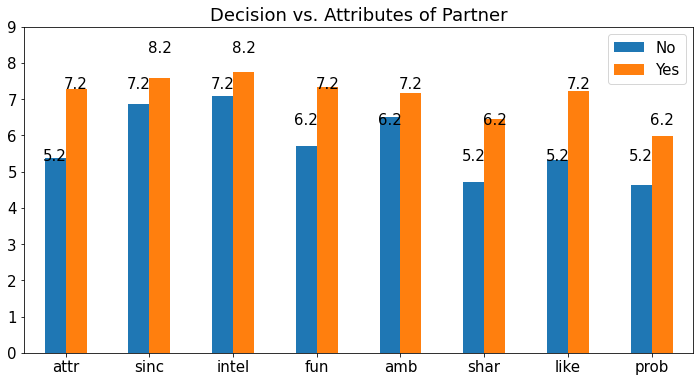

In [210]:
df_decision_partner = df[feats_partner+decision].groupby('dec').mean().stack().unstack(0)

ax = df_decision_partner.plot(kind='bar', figsize=(12,6))
plt.legend(dec)
ax.set_xticklabels(feats_partner, rotation = 'horizontal')
plt.ylim([0, 9])

plt.title('Decision vs. Attributes of Partner', fontsize=18)
plt.rcParams.update({'font.size': 15})
get_annot(ax=ax, decimal=0, distance_to_bar=0.2)

This is evident that we want to date with partners who we evaluate highly. For each criteria, which ones are more important ?

Text(0.5, 0.98, 'Decision vs. Rate of partner')

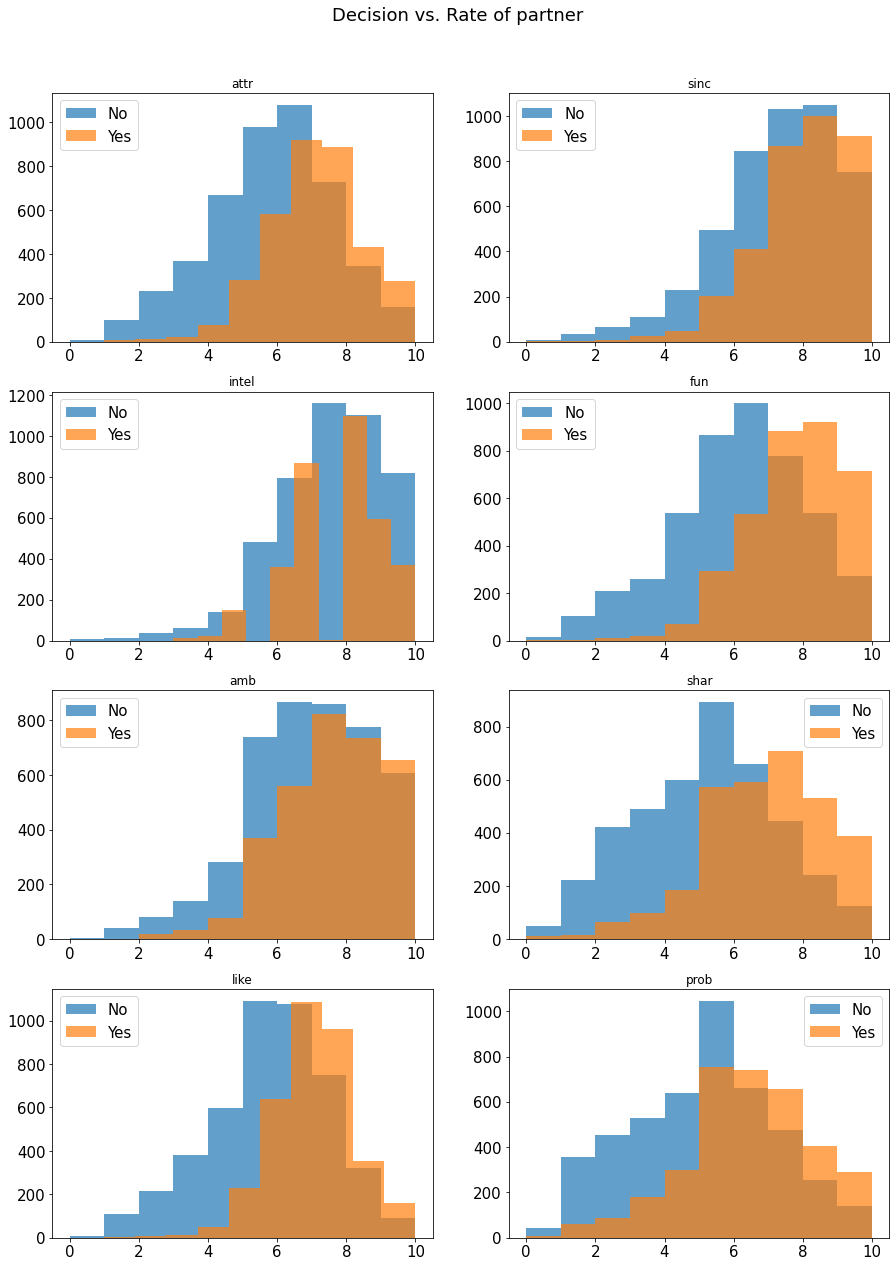

In [146]:
num = len(feats_partner)
rows = int(num/2) + (num % 2 > 0)
fig, ax = plt.subplots(rows, 2, figsize=(15, 5 * (rows)))
i = 0
j = 0
for feat in feats_partner:
    df[df.dec==0][feat].hist(label='No', ax=ax[i][j], bins=10, alpha=0.7)
    df[df.dec==1][feat].hist(label='Yes', ax=ax[i][j], bins=10, alpha=0.7)
    ax[i][j].set_title(feat, fontsize=12)
    ax[i][j].grid(False)
    ax[i][j].legend()
    j = (j+1)%2
    i = i + 1 - j
    
plt.subplots_adjust(top=0.92)
fig.suptitle('Decision vs. Rate of partner', fontsize=18)

Obviously,more Yes decision for high Attribute, Funny, Shared Interest, Like and only for very high Attractiveness, Ambition

#Summary : 
Until now we have considered groups of criteria : 

1.   Age, Race - SameRace, Importance of Religion, Field

*   Age : more favorite for age between 22-30 years old
*   Race - SameRace : European can have Yes decision quite easilly than other races, but the tendancy is not really clear. While the SameRace doesn't have much influence on decision, but this has real impact on choise of Africain participant. 
*   Importance of Religion : no visual influence 
*   Field : no strong influence

2.   Expectation before Speed Dating
* Goal : less serious expectation, more easier to say Yes
*   Exp. of happiness, date, matches : less expectation, more easier to say Yes
*   Expectation of attribution of opposite sex : Man looks for Attractiveness, while woman looks for Ambition

3.  Habit & Interest : 
* Go-out : the more frequently people goes out, the more easier they say Yes for dating
* Date : the less frequently they have date, the more easier they say Yes. 
* Interest : only high Yes-rate for very high note in interests of  museums, art, clubbing, theater, movies, concerts.


4.   When we meet people at Speed Dating : 
* We want to date with people that we rate highly. 
* More Yes decision for high Attribute, Funny, Shared Interest, Like and only for very high Attractiveness, Ambition



#Correlation between considered features and Decision


# Features of participant
 ['age', 'race', 'imprace','imprelig', 'field_cd']

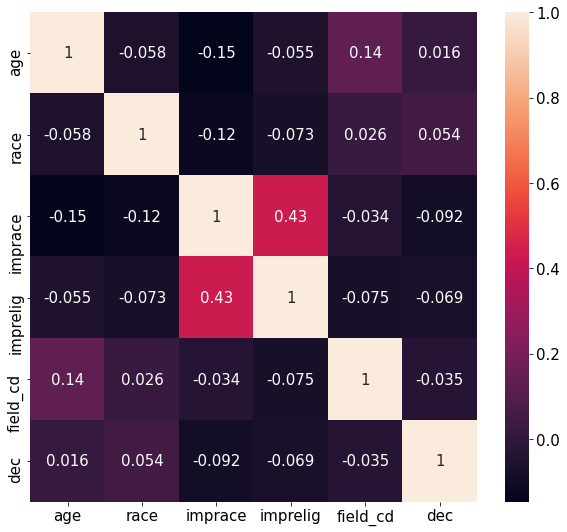

In [214]:
decision = ['dec']
feats_participant = ['age', 'race', 'imprace','imprelig', 'field_cd']
df_participant = df[feats_participant + decision]

fig = plt.subplots(figsize=(10,9))
sns.heatmap(df_participant.corr(), annot=True)

No strong impact observed

#Feature : expectation 
['goal', 'exphappy', 'expnum', 'match_es', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']

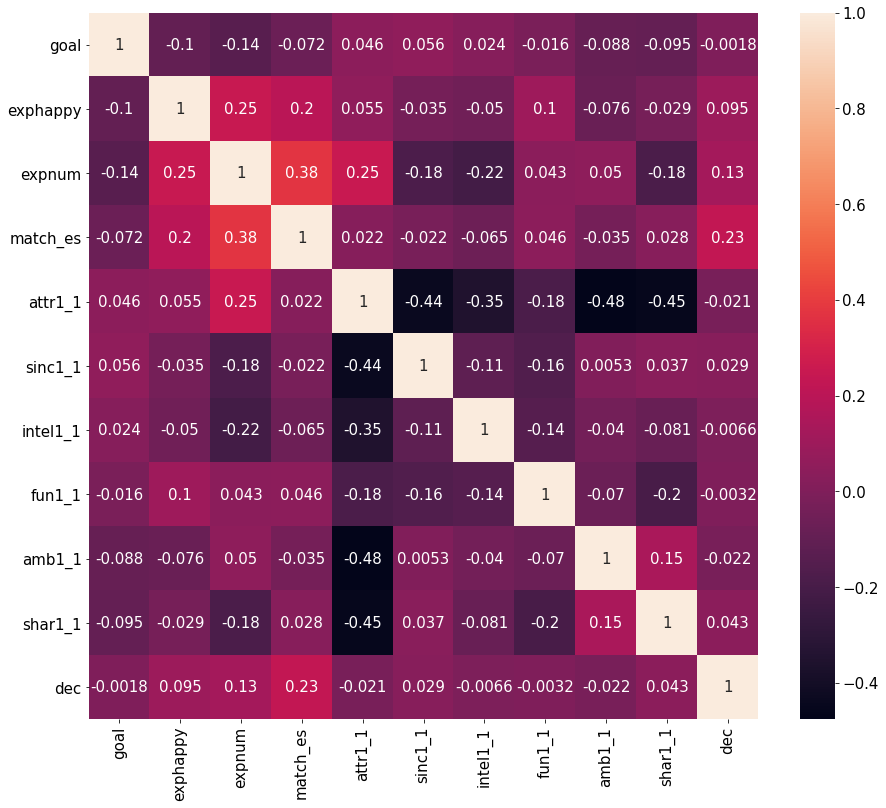

In [216]:
feats_expect = ['goal', 'exphappy', 'expnum', 'match_es', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']
df_expect = df[feats_expect + decision]

fig = plt.figure(figsize=(15,13))
sns.heatmap(df_expect.corr(), annot=True)

Quite strong correlation between dec and match_es (exp. of match), expnum (exp. of dates, exphappy (exp. of happy)

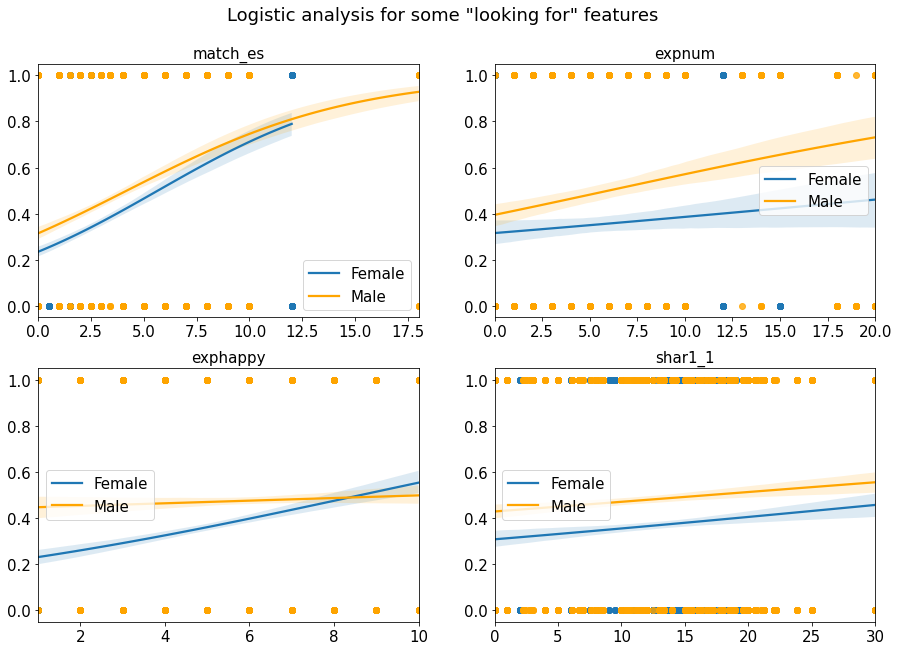

In [219]:
feats_lookfor = ['match_es', 'expnum', 'exphappy', 'shar1_1']
num = len(feats_lookfor)
rows = int(num/2) + (num % 2 > 0)
fig, ax = plt.subplots(rows, 2, figsize=(15, 5 * (rows)))
i = 0
j = 0
n = 0
for feat in feats_lookfor:
    n = n + 1
    plt.subplot(str(rows)+str(2)+str(n))
    sns.regplot(x=feat, y='dec', data=df[df.gender==0], logistic=True)
    sns.regplot(x=feat, y='dec', data=df[df.gender==1], color='orange', logistic=True)

    plt.legend(labels=['Female','Male'], fontsize=15, prop={'size': 15})
    plt.xlabel('')
    plt.ylabel('')
    plt.title(feat, fontsize=15)

    j = (j+1)%2
    i = i + 1 - j

plt.subplots_adjust(top=0.9)
fig.suptitle('Logistic analysis for some "looking for" features', fontsize=18)
plt.show()

Quite strong logistic tendency of match_es as a function of decision is observed for both genders, espacially for man.

#Habit & Interest
['go_out', 'date', 'sports',	'tvsports',	'exercise',	'dining',	'museums',	'art',	'hiking',	'gaming','clubbing',	'reading',	'tv',	'theater',	'movies',	'concerts',	'music',	'shopping',	'yoga']

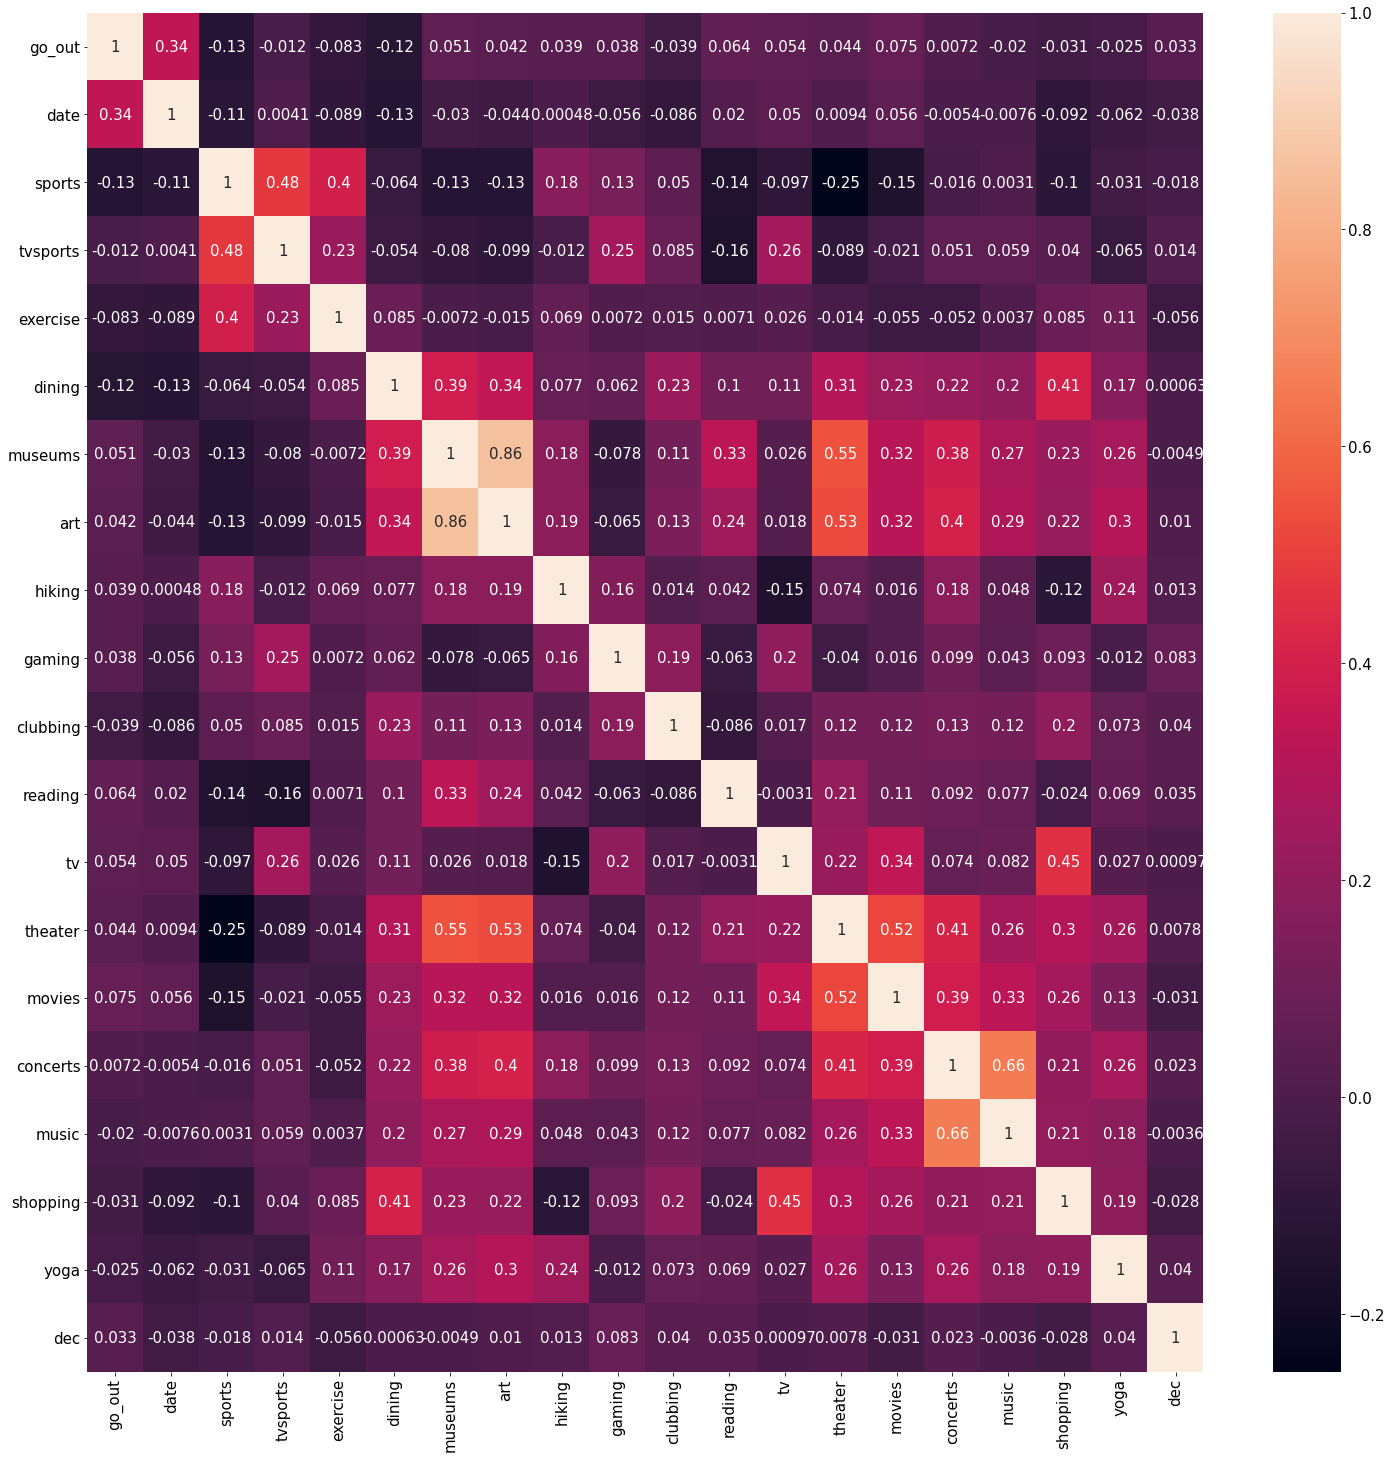

In [224]:
feats_habit = ['go_out', 'date', 'sports',	'tvsports',	'exercise',	'dining',	'museums',	'art',	'hiking',	'gaming',
                'clubbing',	'reading',	'tv',	'theater',	'movies',	'concerts',	'music',	'shopping',	'yoga']
df_habit = df[feats_habit + decision]

fig = plt.figure(figsize=(25,25))
sns.heatmap(df_habit.corr(), annot=True)

In [229]:
abs(df_habit.corr()['dec']).sort_values(ascending=False)

dec         1.000000
gaming      0.083472
exercise    0.056415
yoga        0.039920
clubbing    0.039772
date        0.037687
reading     0.035466
go_out      0.032565
movies      0.031152
shopping    0.028189
concerts    0.022550
sports      0.018469
tvsports    0.014082
hiking      0.012811
art         0.010316
theater     0.007804
museums     0.004912
music       0.003606
tv          0.000970
dining      0.000628
Name: dec, dtype: float64

No explicit impact observed on decision

#Partner features
age_o	race_o	pf_o_att	pf_o_sin	pf_o_int	pf_o_fun	pf_o_amb	pf_o_sha	dec_o	attr_o	sinc_o	intel_o	fun_o	amb_o	shar_o	like_o	prob_o	met_o

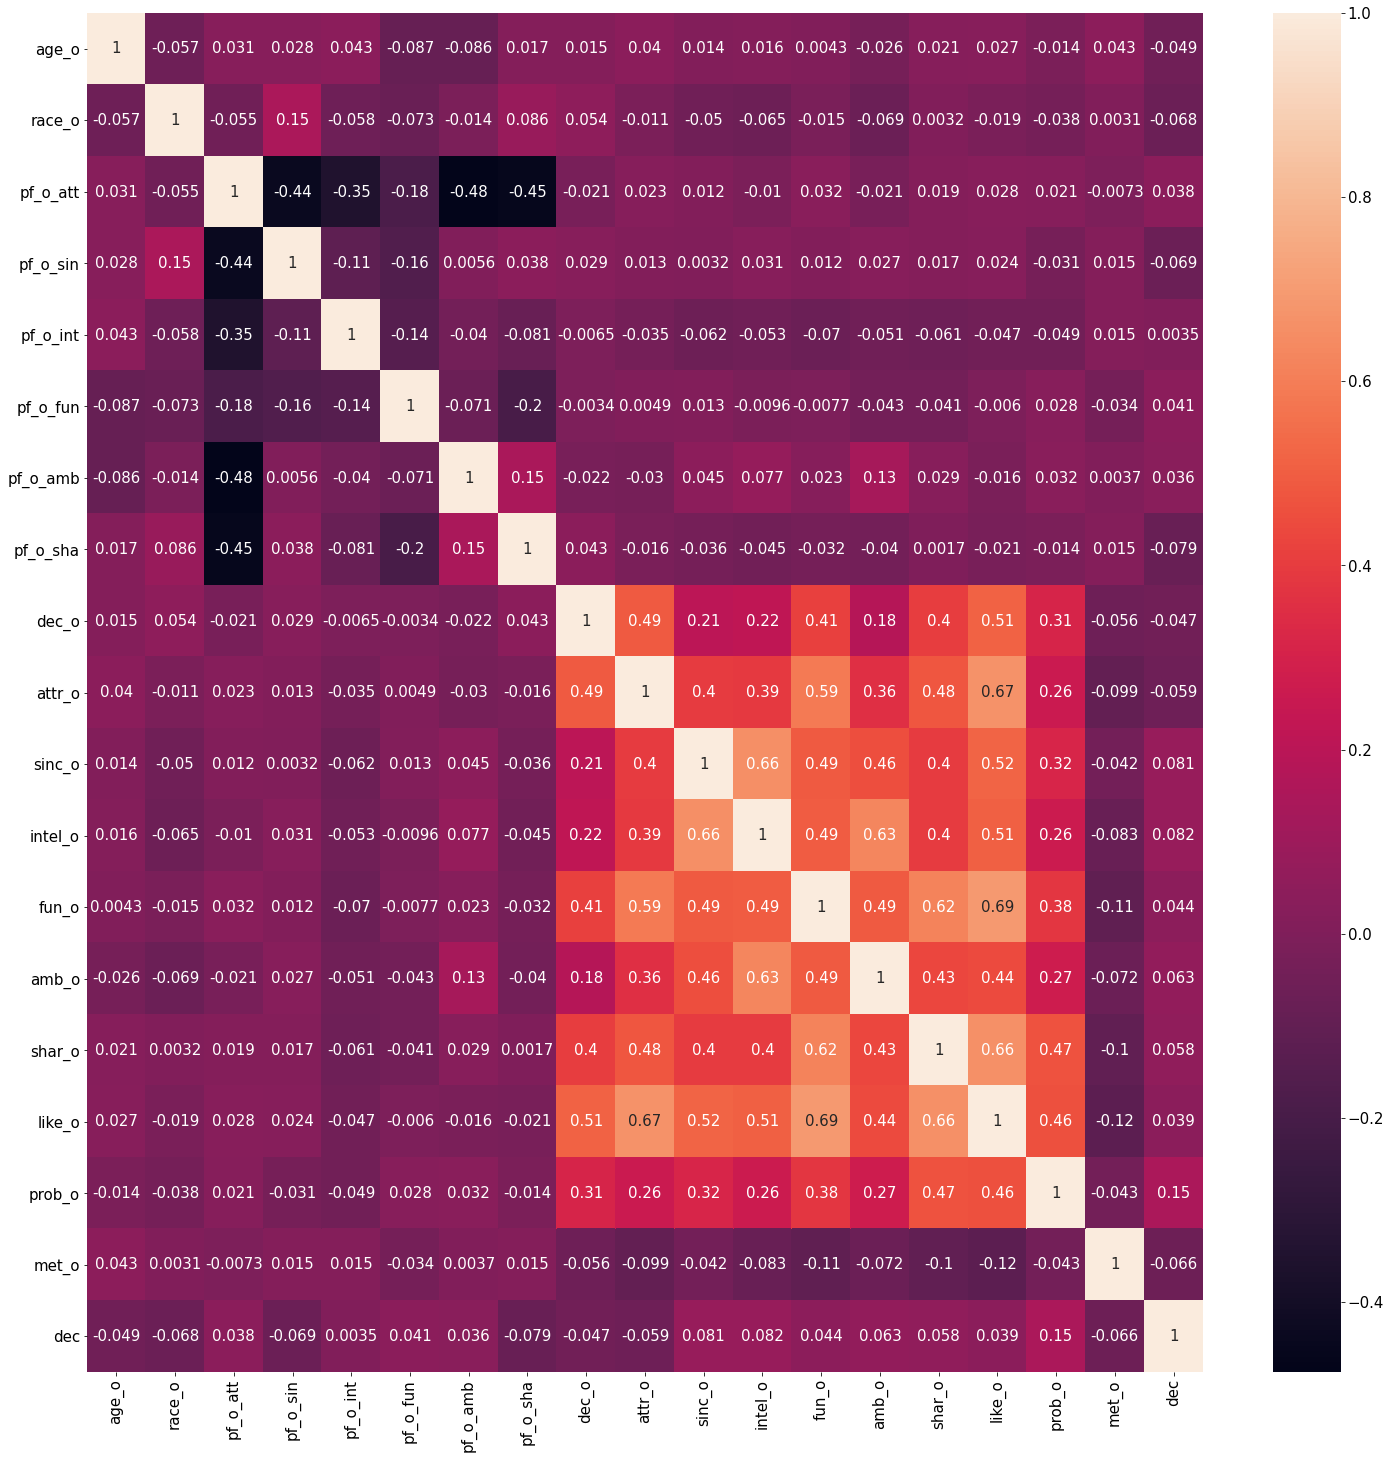

In [237]:
partner = ['age_o',	'race_o',	'pf_o_att',	'pf_o_sin',	'pf_o_int',	'pf_o_fun',	'pf_o_amb',	'pf_o_sha',	
           'dec_o',	'attr_o',	'sinc_o',	'intel_o',	'fun_o',	'amb_o',	'shar_o',	'like_o',	'prob_o',	'met_o']

df_partner = df[partner + decision]

fig = plt.figure(figsize=(25,25))
sns.heatmap(df_partner.corr(), annot=True)

In [238]:
abs(df_partner.corr())['dec'].sort_values(ascending=False)

dec         1.000000
prob_o      0.150634
intel_o     0.081869
sinc_o      0.081447
pf_o_sha    0.079243
pf_o_sin    0.069217
race_o      0.068101
met_o       0.065540
amb_o       0.063330
attr_o      0.059360
shar_o      0.057808
age_o       0.049387
dec_o       0.047038
fun_o       0.044162
pf_o_fun    0.041369
like_o      0.038860
pf_o_att    0.037882
pf_o_amb    0.036339
pf_o_int    0.003488
Name: dec, dtype: float64

* Only correlation between prob_o & decision is quite significant, while other features don't show strong impact. 
* High prob_o shows that partners want potentiellaly to date with this participant. 

No handles with labels found to put in legend.


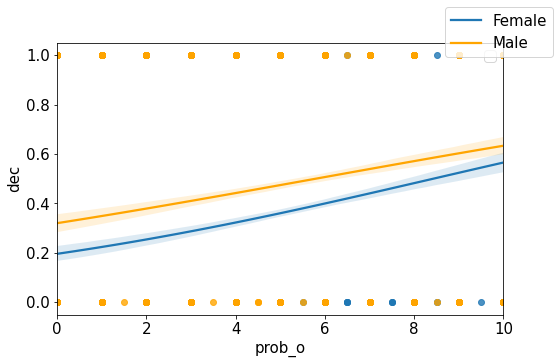

In [247]:
fig = plt.figure(figsize=(8,5))
sns.regplot(x='prob_o', y='dec', data=df[df.gender==0], logistic=True)
sns.regplot(x='prob_o', y='dec', data=df[df.gender==1], color='orange', logistic=True)
fig.legend(labels=['Female','Male'], fontsize=15)
plt.legend(prop={'size': 15})
plt.show()

#Features : rate
['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met']

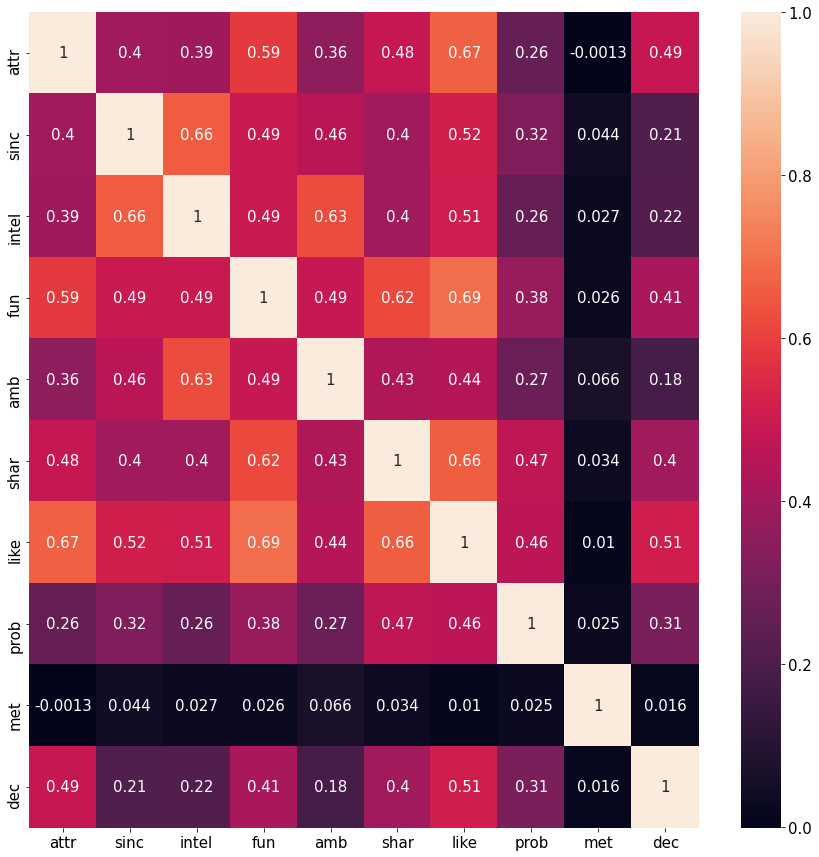

In [233]:
feats_rate = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met']
df_rate = df[feats_rate + decision]

fig = plt.figure(figsize=(15,15))
sns.heatmap(df_rate.corr(), annot=True)

In [234]:
abs(df_rate.corr())['dec'].sort_values(ascending=False)

dec      1.000000
like     0.513463
attr     0.486775
fun      0.414477
shar     0.400644
prob     0.310861
intel    0.217313
sinc     0.209994
amb      0.183659
met      0.016100
Name: dec, dtype: float64

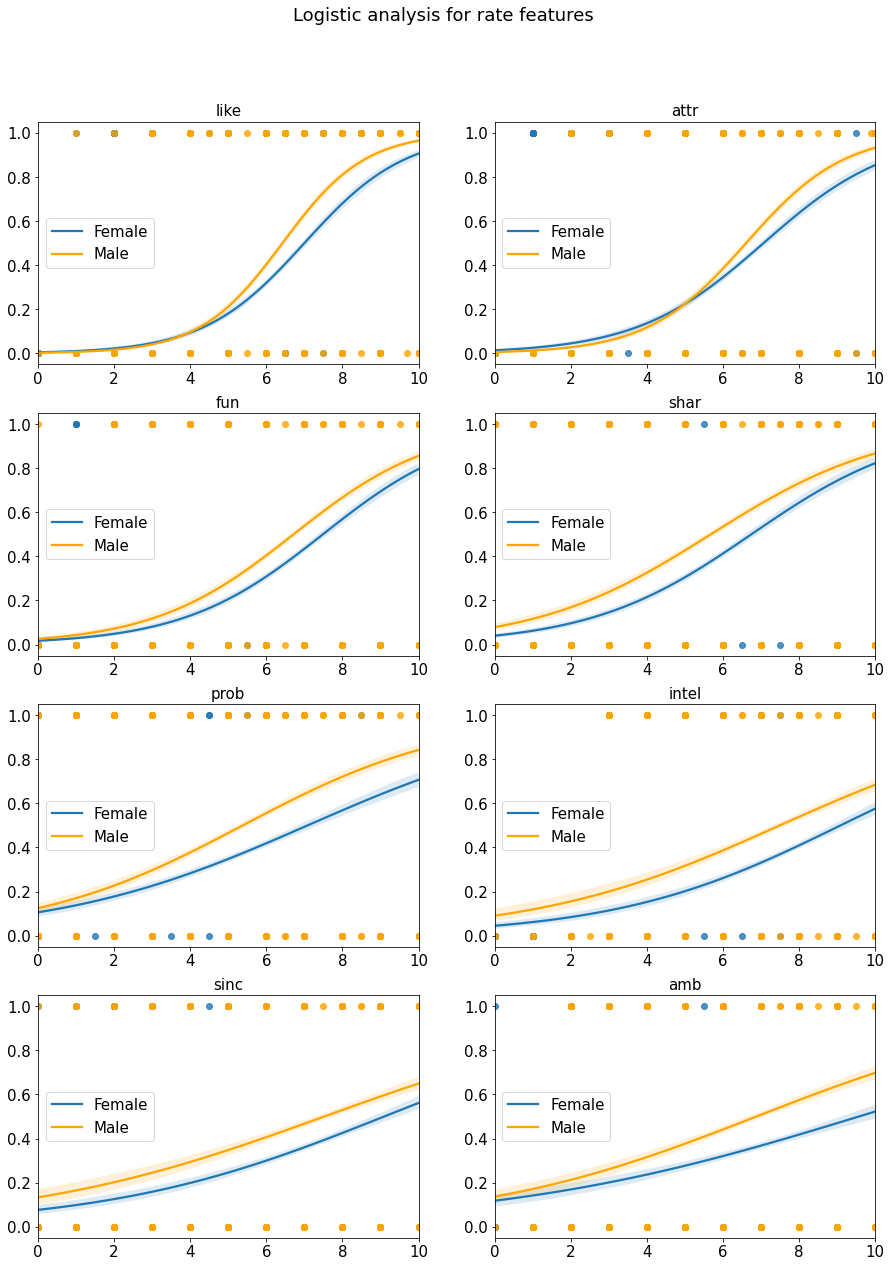

In [248]:
feats = ['like', 'attr', 'fun', 'shar', 'prob', 'intel', 'sinc', 'amb']

num = len(feats)
rows = int(num/2) + (num % 2 > 0)
fig, ax = plt.subplots(rows, 2, figsize=(15, 5 * (rows)))
i = 0
j = 0
n = 0
for feat in feats:
    n = n + 1
    plt.subplot(str(rows)+str(2)+str(n))
    sns.regplot(x=feat, y='dec', data=df[df.gender==0], logistic=True)
    sns.regplot(x=feat, y='dec', data=df[df.gender==1], color='orange', logistic=True)

    plt.legend(labels=['Female','Male'], fontsize=15, prop={'size': 15})
    plt.xlabel('')
    plt.ylabel('')
    plt.title(feat, fontsize=15)

    j = (j+1)%2
    i = i + 1 - j

plt.subplots_adjust(top=0.9)
fig.suptitle('Logistic analysis for rate features', fontsize=18)
plt.show()

Strong logistic correlation between like, attractiveness, fun and shared interest with Decision, especially for man.

#Classification model to prediction Yes/No decision
Until now, we have seen a lot of features that influence on the decision of people during the Speed Dating. 
To reminder : 
* Participant features : No strong impact observed
* Quite strong correlation between dec and match_es (exp. of match), expnum (exp. of dates, exphappy (exp. of happy)
* Habit & Interests : No explicit impact observed on decision
* Partner features : Strong logistic correlation between like, attractiveness, fun and shared interest with Decision, especially for man.

# Models : LogisticRegression, RandomForestClassification, 

In [ ]:
#decision = ['dec']
#feats_participant = ['age', 'race', 'imprace','imprelig', 'field_cd']
#feats_expect = ['goal', 'exphappy', 'expnum', 'match_es', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']
#feats_habit = ['go_out', 'date', 'sports',	'tvsports',	'exercise',	'dining',	'museums',	'art',	'hiking',	'gaming',
#                'clubbing',	'reading',	'tv',	'theater',	'movies',	'concerts',	'music',	'shopping',	'yoga']
#feats_rate = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met']